In [53]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn
import scipy 
from bokeh.models import ColumnDataSource

In [2]:
#Goal of my Analysis - possible correlation of counties with worse air quality and fires 
#Focus on year 2015 and inhable particulates PM2.5 (PM = Particulate Matter)

In [3]:
#Fire Data
fire_file = "./Fires.csv"


fire_file_df = pd.read_csv(fire_file, encoding="ISO-8859-1")

fire_file_df.columns



C:\Users\RobertW\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [4]:
# #fips_codes https://www2.census.gov/geo/docs/reference/codes/files/national_county.txt
# fips_file = './fips.txt'

# fips_file_df = pd.read_csv('./fips.txt', delimiter = ",")
# fips_file_df.head()



In [5]:
# #Only fips for CA
# keep_fips_CA = {'fips_state': [6]}

# filtered_fips_file_df = fips_file_df[fips_file_df[list(keep_fips_CA)].isin(keep_fips_CA).all(axis=1)]

# filtered_fips_file_df



In [6]:
#reduce fire columns
reduced_fire_file_df = fire_file_df[['FIRE_YEAR','FIRE_NAME','DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE','FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME']]
                                                                   

reduced_fire_file_df.head()

,FIRE_YEAR,FIRE_NAME,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,2005,FOUNTAIN,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63.0,63.0,Plumas
1,2004,PIGEON,2453137.5,133,845.0,1.0,Lightning,2453137.5,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61.0,61.0,Placer
2,2004,SLACK,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17.0,17.0,El Dorado
3,2004,DEER,2453184.5,180,1600.0,1.0,Lightning,2453189.5,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3.0,3.0,Alpine
4,2004,STEVENOT,2453184.5,180,1600.0,1.0,Lightning,2453189.5,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3.0,3.0,Alpine


In [7]:
#filter fire data for year and state

keep_fire = {'FIRE_YEAR': [2015], 'STATE': ['CA']}
filtered_fire = reduced_fire_file_df[reduced_fire_file_df[list(keep_fire)].isin(keep_fire).all(axis=1)]

filtered_fire_df = pd.DataFrame(filtered_fire)



In [8]:
# #change fips code to county
# inner_join_fire_fips = pd.merge(reduced_fire_file_df, 
#                       fips_file_df, 
#                       on ='FIPS_CODE', 
#                       how ='inner')
# inner_join_fire_fips_df = pd.DataFrame(inner_join_fire_fips) 
# inner_join_fire_fips_df


In [9]:
# #filter fire data for year and state

# keep_fire = {'FIRE_YEAR': [2015], 'STATE': ['CA']}
# filter_fire_ca_df = filtered_fire_df[list(keep_fire)].isin(keep_fire).all(axis=1)



In [10]:
filtered_fire_df

,FIRE_YEAR,FIRE_NAME,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
1790382,2015,SAWMILL,2457211.5,189,1100.0,1.0,Lightning,2457212.5,0.10,A,38.633611,-119.789444,5.0,USFS,CA,003,3.0,Alpine
1790384,2015,EAGLE 2,2457246.5,224,1417.0,1.0,Lightning,2457258.5,120.00,D,38.224722,-119.381944,5.0,USFS,CA,051,51.0,Mono
1790385,2015,GOLDEN GATE,2457202.5,180,2124.0,1.0,Lightning,2457205.5,0.25,A,38.528056,-119.553333,5.0,USFS,CA,051,51.0,Mono
1790386,2015,LEAVITT,2457188.5,166,1328.0,9.0,Miscellaneous,2457188.5,1.00,B,38.365000,-119.523611,5.0,USFS,CA,051,51.0,Mono
1790387,2015,VAQUERO,2457200.5,178,2200.0,1.0,Lightning,2457201.5,0.10,A,38.550833,-119.611667,5.0,USFS,CA,003,3.0,Alpine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,2015,ODESSA 2,2457291.5,269,1726.0,13.0,Missing/Undefined,2457291.5,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,NaN,NaN,NaN
1880461,2015,NaN,2457300.5,278,126.0,9.0,Miscellaneous,NaN,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN
1880462,2015,NaN,2457144.5,122,2052.0,13.0,Missing/Undefined,NaN,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN
1880463,2015,NaN,2457309.5,287,2309.0,13.0,Missing/Undefined,NaN,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN


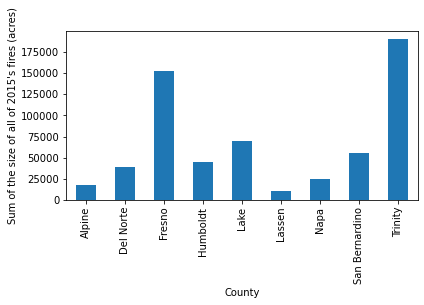

In [11]:
# Create a group based on the values in the 'fips_county' column with more than 2000 total acres in 2015
fire_county_group = filtered_fire_df.groupby('FIPS_NAME')

# Count how many times each maker appears in our group
fire_size_sum = fire_county_group['FIRE_SIZE'].sum()[fire_county_group['FIRE_SIZE'].sum() > 10000 ]

# Create a bar chart based off of the group series from before
fire_size_sum_chart = fire_size_sum.plot(kind='bar')

# Set the xlabel and ylabel using class methods
fire_size_sum_chart.set_xlabel("County",)
fire_size_sum_chart.set_ylabel("Sum of the size of all of 2015's fires (acres)")

plt.tight_layout()
plt.show()

In [12]:
#Air Quality Data 
CA_air_quality = "./CA_air_quality_annual_summary.csv"

CA_air_quality_df = pd.read_csv(CA_air_quality, encoding="ISO-8859-1")


CA_air_quality_df




,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,seventy_five_percentile,fifty_percentile,ten_percentile,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
0,6,27,20,61104,1,36.057185,-117.861369,NAD83,Wind Direction - Resultant,1 HOUR,...,227.9,132.9,33.0,Coso Gate,COSO GATE,California,Inyo,NaN,"Bishop, CA",2020-05-21
1,6,27,20,61101,1,36.057185,-117.861369,NAD83,Wind Speed - Scalar,1 HOUR,...,12.6,8.0,2.3,Coso Gate,COSO GATE,California,Inyo,NaN,"Bishop, CA",2020-05-21
2,6,27,20,62201,1,36.057185,-117.861369,NAD83,Relative Humidity,1 HOUR,...,35.0,25.0,14.0,Coso Gate,COSO GATE,California,Inyo,NaN,"Bishop, CA",2020-05-21
3,6,27,20,61106,1,36.057185,-117.861369,NAD83,Std Dev Hz Wind Direction,1 HOUR,...,32.9,18.1,8.0,Coso Gate,COSO GATE,California,Inyo,NaN,"Bishop, CA",2020-05-21
4,6,27,20,61106,1,36.057185,-117.861369,NAD83,Std Dev Hz Wind Direction,1 HOUR,...,31.8,17.7,8.1,Coso Gate,COSO GATE,California,Inyo,NaN,"Bishop, CA",2020-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305644,6,79,2007,61106,1,35.046730,-120.587770,NAD83,Std Dev Hz Wind Direction,1 HOUR,...,33.0,20.4,12.0,Arroyo Grande CDF,"2391 Willow Road, Arroyo Grande, California",California,San Luis Obispo,Arroyo Grande,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2020-05-21
305645,6,79,2007,88101,1,35.046730,-120.587770,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,11.8,8.3,3.7,Arroyo Grande CDF,"2391 Willow Road, Arroyo Grande, California",California,San Luis Obispo,Arroyo Grande,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2020-05-21
305646,6,79,2007,88101,1,35.046730,-120.587770,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,12.2,8.4,3.0,Arroyo Grande CDF,"2391 Willow Road, Arroyo Grande, California",California,San Luis Obispo,Arroyo Grande,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2020-05-21
305647,6,79,2007,88101,1,35.046730,-120.587770,NAD83,PM2.5 - Local Conditions,1 HOUR,...,11.0,7.0,2.0,Arroyo Grande CDF,"2391 Willow Road, Arroyo Grande, California",California,San Luis Obispo,Arroyo Grande,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2020-05-21


In [13]:
CA_air_quality_df.columns

Index(['state_code', 'county_code', 'site_num', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter_name', 'sample_duration',
       'pollutant_standard', 'metric_used', 'method_name', 'year',
       'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'completeness_indicator', 'valid_day_count',
       'required_day_count', 'exceptional_data_count', 'null_data_count',
       'primary_exceedance_count', 'secondary_exceedance_count',
       'certification_indicator', 'num_obs_below_mdl', 'arithmetic_mean',
       'arithmetic_standard_dev', 'first_max_value', 'first_max_datetime',
       'second_max_value', 'second_max_datetime', 'third_max_value',
       'third_max_datetime', 'fourth_max_value', 'fourth_max_datetime',
       'first_max_non_overlapping_value', 'first_no_max_datetime',
       'second_max_non_overlapping_value', 'second_no_max_datetime',
       'ninety_nine_percentile', 'ninety_eight_percentile',
       'ninety_five_

In [14]:
#reduce air quality columns
reduced_CA_air_quality_df = CA_air_quality_df[['state_code', 'county_code', 'site_num',
       'latitude', 'longitude', 'parameter_name', 'sample_duration', 'metric_used', 'year',
       'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'arithmetic_mean',
       'arithmetic_standard_dev', 'first_max_value',  'address', 'state_name', 'county_name', 'city_name',
       'date_of_last_change']]

reduced_CA_air_quality_df

,state_code,county_code,site_num,latitude,longitude,parameter_name,sample_duration,metric_used,year,units_of_measure,...,observation_count,observation_percent,arithmetic_mean,arithmetic_standard_dev,first_max_value,address,state_name,county_name,city_name,date_of_last_change
0,6,27,20,36.057185,-117.861369,Wind Direction - Resultant,1 HOUR,Observed Values,2019,Degrees Compass,...,8748,100.0,161.689449,96.641771,360.0,COSO GATE,California,Inyo,NaN,2020-05-21
1,6,27,20,36.057185,-117.861369,Wind Speed - Scalar,1 HOUR,Observed Values,1999,Knots,...,8744,100.0,8.929094,5.814807,38.8,COSO GATE,California,Inyo,NaN,2020-05-21
2,6,27,20,36.057185,-117.861369,Relative Humidity,1 HOUR,Observed Values,1999,Percent relative humidity,...,8755,100.0,29.532381,17.262424,100.0,COSO GATE,California,Inyo,NaN,2020-05-21
3,6,27,20,36.057185,-117.861369,Std Dev Hz Wind Direction,1 HOUR,Observed Values,2018,Degrees Compass,...,8756,100.0,24.100137,16.569915,79.3,COSO GATE,California,Inyo,NaN,2020-05-21
4,6,27,20,36.057185,-117.861369,Std Dev Hz Wind Direction,1 HOUR,Observed Values,2019,Degrees Compass,...,8748,100.0,23.739106,16.333843,80.5,COSO GATE,California,Inyo,NaN,2020-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305644,6,79,2007,35.046730,-120.587770,Std Dev Hz Wind Direction,1 HOUR,Observed Values,2010,Degrees Compass,...,7741,88.0,25.136701,13.348003,81.9,"2391 Willow Road, Arroyo Grande, California",California,San Luis Obispo,Arroyo Grande,2020-05-21
305645,6,79,2007,35.046730,-120.587770,PM2.5 - Local Conditions,24-HR BLK AVG,Quarterly Means of Daily Means,2012,Micrograms/cubic meter (LC),...,353,96.0,9.622663,6.365969,41.6,"2391 Willow Road, Arroyo Grande, California",California,San Luis Obispo,Arroyo Grande,2020-05-21
305646,6,79,2007,35.046730,-120.587770,PM2.5 - Local Conditions,24-HR BLK AVG,Quarterly Means of Daily Means,2017,Micrograms/cubic meter (LC),...,346,95.0,9.608671,6.036352,32.1,"2391 Willow Road, Arroyo Grande, California",California,San Luis Obispo,Arroyo Grande,2020-05-21
305647,6,79,2007,35.046730,-120.587770,PM2.5 - Local Conditions,1 HOUR,Observed Values,2012,Micrograms/cubic meter (LC),...,8479,97.0,9.708692,11.953676,139.0,"2391 Willow Road, Arroyo Grande, California",California,San Luis Obispo,Arroyo Grande,2020-05-21


In [15]:
#filter air quality data for 2.5 PM /24 hr duration/2015
keep_air = {'year': [2015], 'state_name': ['California'], 'sample_duration': ['24-HR BLK AVG'], 'parameter_name':['PM2.5 - Local Conditions']}

filtered_air_df = reduced_CA_air_quality_df[reduced_CA_air_quality_df[list(keep_air)].isin(keep_air).all(axis=1)]

filtered_air_df




,state_code,county_code,site_num,latitude,longitude,parameter_name,sample_duration,metric_used,year,units_of_measure,...,observation_count,observation_percent,arithmetic_mean,arithmetic_standard_dev,first_max_value,address,state_name,county_name,city_name,date_of_last_change
406,6,27,1003,36.487823,-117.871036,PM2.5 - Local Conditions,24-HR BLK AVG,Quarterly Means of Daily Means,2015,Micrograms/cubic meter (LC),...,352,96.0,7.010511,8.929759,130.2,"KEELER, 190 Cerro Gordo Road",California,Inyo,Keeler,2020-05-21
430,6,27,1003,36.487823,-117.871036,PM2.5 - Local Conditions,24-HR BLK AVG,Quarterly Means of Daily Means,2015,Micrograms/cubic meter (LC),...,352,96.0,7.010511,8.929759,130.2,"KEELER, 190 Cerro Gordo Road",California,Inyo,Keeler,2020-05-21
546,6,27,1003,36.487823,-117.871036,PM2.5 - Local Conditions,24-HR BLK AVG,Daily Mean,2015,Micrograms/cubic meter (LC),...,352,96.0,7.010511,8.929759,130.2,"KEELER, 190 Cerro Gordo Road",California,Inyo,Keeler,2020-05-21
705,6,27,1003,36.487823,-117.871036,PM2.5 - Local Conditions,24-HR BLK AVG,Daily Mean,2015,Micrograms/cubic meter (LC),...,352,96.0,7.010511,8.929759,130.2,"KEELER, 190 Cerro Gordo Road",California,Inyo,Keeler,2020-05-21
1659,6,27,2,37.360684,-118.330783,PM2.5 - Local Conditions,24-HR BLK AVG,Daily Mean,2015,Micrograms/cubic meter (LC),...,274,75.0,7.088321,8.651389,97.1,"WMRC/NCORE, 3000 E. LINE ST., BISHOP, CA. 93514",California,Inyo,NaN,2020-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305192,6,79,2004,35.020830,-120.563880,PM2.5 - Local Conditions,24-HR BLK AVG,Daily Mean,2015,Micrograms/cubic meter (LC),...,359,98.0,8.729526,4.210378,31.6,"1300 GUADALUPE RD., NIPOMO, CA., 93444",California,San Luis Obispo,Nipomo,2020-05-21
305250,6,79,2004,35.020830,-120.563880,PM2.5 - Local Conditions,24-HR BLK AVG,Quarterly Means of Daily Means,2015,Micrograms/cubic meter (LC),...,359,98.0,8.729526,4.210378,31.6,"1300 GUADALUPE RD., NIPOMO, CA., 93444",California,San Luis Obispo,Nipomo,2020-05-21
305385,6,79,8001,35.491580,-120.668040,PM2.5 - Local Conditions,24-HR BLK AVG,Daily Mean,2015,Micrograms/cubic meter (LC),...,51,14.0,11.854902,6.070694,29.1,"6005 LEWIS AVENUE, ATASCADERO, CA 93422",California,San Luis Obispo,Atascadero,2020-05-21
305544,6,79,2006,35.256510,-120.669300,PM2.5 - Local Conditions,24-HR BLK AVG,Daily Mean,2015,Micrograms/cubic meter (LC),...,246,67.0,5.521545,3.001752,16.4,"3220 SOUTH HIGUERA STREET, SAN LUIS OBISPO",California,San Luis Obispo,San Luis Obispo,2021-03-17


In [ ]:
filtered_air_df 

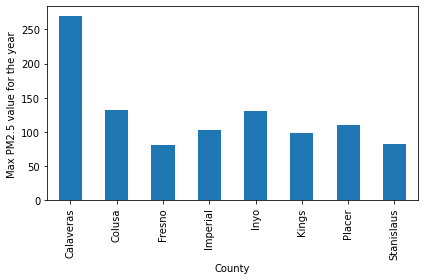

In [57]:
# Create a group based on the values in the 'county_name' column
filtered_air_group = filtered_air_df.groupby('county_name')


filtered_air_group_max = filtered_air_group['first_max_value'].max()[filtered_air_group['first_max_value'].max() > 75 ]

# Create a bar chart based off of the group series from before
air_mean_chart = filtered_air_group_mean.plot(kind='bar')

# Set the xlabel and ylabel using class methods
air_mean_chart.set_xlabel("County")
air_mean_chart.set_ylabel("Max PM2.5 value for the year")


plt.tight_layout()
plt.show()

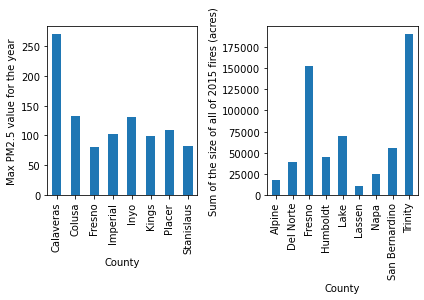

In [58]:
#Analysis - possible correlation of counties with worse air quality and fires 
#plot two counties side by side fire vs air quality

fig, axes = plt.subplots(nrows=1, ncols=2)

ax1 = fire_size_sum.plot(ax = axes[1], kind='bar')
ax1.set_ylabel('Sum of the size of all of 2015 fires (acres)')
ax1.set_xlabel('County')



ax2 = filtered_air_group_max.plot(ax = axes[0], kind='bar')
ax2.set_ylabel('Max PM2.5 value for the year')
ax2.set_xlabel('County')


plt.tight_layout()


In [18]:
! pip3 install gmaps

In [19]:
! jupyter nbextension enable --py gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [20]:
# Dependencies and Setup
import gmaps
import os

# Import API key
from api_keys import g_key

In [21]:
#config gmaps
gmaps.configure(api_key=g_key)

In [39]:
#narrowed dataframe show biggest fires
narrow_fire_df = filtered_fire_df[['FIRE_YEAR','FIRE_NAME','FIRE_SIZE','LATITUDE',
                                    'LONGITUDE','STATE','FIPS_NAME']]
narrow_fire_acre_100 = narrow_fire_df.loc[narrow_fire_df['FIRE_SIZE'] > 100]


narrow_fire_acre_100.head()

,FIRE_YEAR,FIRE_NAME,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,FIPS_NAME
1790384,2015,EAGLE 2,120.0,38.224722,-119.381944,CA,Mono
1790623,2015,CHORRO,282.0,34.596944,-119.330556,CA,Ventura
1790676,2015,FROG,4812.0,41.398333,-121.391667,CA,Modoc
1790721,2015,SUMMIT,639.0,41.587778,-123.797222,CA,Humboldt
1790722,2015,FEEDER,898.0,41.601111,-123.851389,CA,Del Norte


In [70]:
#heatmap of fire data california
locations = narrow_fire_df[['LATITUDE', 'LONGITUDE']]
fire_size = narrow_fire_df['FIRE_SIZE']
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=fire_size, dissipating=True, max_intensity=300, point_radius=5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [68]:
#air dataframe Max PM2.5 value for the year > 75 
#longitude and latitude for counties here https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2020_Gazetteer/2020_gaz_counties_06.txt


filtered_air_group_max_df = pd.DataFrame(filtered_air_group_max)


filtered_air_group_max_df 

,first_max_value
county_name,
Calaveras,270.1
Colusa,132.5
Fresno,80.7
Imperial,102.7
Inyo,130.2
Kings,98.2
Placer,109.8
Stanislaus,82.8


In [84]:
#heatmap of air quality by Max PM2.5 value for the year
locations = filtered_air_df[['latitude', 'longitude']]
max_air_quality = filtered_air_df['first_max_value']

fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations=locations, weights=max_air_quality, dissipating=True, max_intensity=300, point_radius=10)
fig.add_layer(heat_layer)
fig




Figure(layout=FigureLayout(height='420px'))